$$\text{Bagging}$$

#### What is bagging?

> Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. -- *IBM*

> Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the variance of a statistical learning method. -- *An Introduction to Statistical Learning*

> One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed. Another approach is to use the same training algorithm for every predictor but to train them on different random subsets of the training set. When sampling is performed *with* replacement, this method is called *bagging*. -- *Hands-on Machine Learning*

In the last passage, I talked about the conception of **Decision Tree** and its use. Although being very powerful model that can handle both regression and classification tasks,  decision trees usually suffer from *high variance*. This means that if we split the dataset into two parts at random and fit a decision tree to the two halves, we will get quite different results. Thus we need one approach to reduce variance at the expense of bias. 

Bagging, which is designed for the context, is just the procedure for reducing the variance of weak models. In *bagging*, a random sample of data in the training set is selected with replacement - which means individual data points can be chosen more than once - and then we fit a weak learner, such as a decision tree, to each of the sample data. Finally, we aggregate the predictions of base learners to get a more accurate estimate.

We build B distinct sample datasets from the train set using bootstrapped training data sets, and calculate the prediction $\hat{f}^1(x),\hat{f}^2(x),\dots,\hat{f}^B(x)$ using B separate training sets, and average them in order to obtain a low-variance statistical model:

$$\hat{f}_{avg}(x) = \frac{1}{B}\sum_{b=1}^B\hat{f}^b(x)$$

While bagging can reduce the variance for many models, it is particularly useful for decision trees. To apply bagging, we simply construct B separate bootstrapped training sets and train B individual decision trees on these training sets. Each tree can grow very deep and not be pruned, thus they have high variance but low bias. Hence, averaging these trees can reduce variance.

#### How Bagging Works?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/440px-Ensemble_Bagging.svg.png" width=400>

Bagging has three steps to complete: *bootstraping, parallel training, and aggregating.*

- **Bootstrapping:** bagging leverages bootstrapping sampling techniques to create a set of sample data. The sampling method generates distinct samples by selecting observations from the training set at random with replacement. "With replacement" means that each data point in the train set can be chosen more than multiple times, so it can occur repeatedly in a dataset.
- **Parallel training:** bootstrapped samples are trained independently with parallel using weak or base learners. 
- **Aggregating:** depending on the tasks(regression or classification), an average or majority of predictions are taken to compute a more accurate estimate. In the case of regression, we take the average of all outputs predicted by individual regressors, which is also known as *soft voting*. In the case of classification, the class with the majority of votes is the predicted output, which is also known as *majority voting*.

#### Benefits and Challenges of Bagging

There are a number of key benefits for bagging, including:

- **Reduction in variance.** Bagging can reduce variance by taking the average or majority of a number of base learners. This is particularly helpful in the case of the hgih-dimensional dataset, where missing values can lead to high variance and make it very prone to overfitting. 
- **Easy implementation.** Python libraries have Scikit-Learn packages that make it very easy to perform bagging. 

The key disadvantages of bagging are:

- **Loss of interpretability.** One of the biggest advantages of decision trees is it's high interpretability. However, bagging a number of decision tress make it impossible to represent the result using one single tree, so we do know which variable is the most important one for the ensemble model. 
- **Computationally Expensive.**  Bagging will slow down as the number of iterations increases. Thus, it’s not well-suited for real-time applications.
- **Less flexible.** As a technique, bagging works particularly well with algorithms that are less stable. One that is more stable or subject to high amounts of bias does not provide as much benefit as there’s less variation within the dataset of the model. As noted in Hands-on Guide to Machine Learning, "bagging a linear regression model will effectively just return the original predictions for large enough *b*".

#### Lab

Now we practice how to use bagging to improve the performance of models. The scikit-learn Python machine learning library provides easy access to the bagging method.

##### Bagging for Classification

First, we use `make_classification` function to construct the classification dataset for practice of the bagging problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification

%matplotlib inline
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

Here, we make a binary problem dataset with 1000 observations and 30 input features. 

In [2]:
X,y = make_classification(n_samples=3000,n_features=30,n_informative=15,
                   n_redundant=5,random_state=42)
print(X.shape,y.shape)

(3000, 30) (3000,)


In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,train_size=0.75)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2250, 30) (750, 30) (2250,) (750,)


To demonstrate the benefits of bagging model, we first build one decision tree and compare it to bagging model.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# build one tree
tree_clf = DecisionTreeClassifier()

# use cross validation to evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=2,random_state=42)
cv_scores = cross_val_score(tree_clf,X_train,y_train,scoring="accuracy",cv=cv)

# output the results
print("Accuracy:%.3f (std: %.3f)"%(np.mean(cv_scores),np.std(cv_scores)))

Accuracy:0.814 (std: 0.026)


Now we begin construct an ensemble model using bagging technique.

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# define the BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())

# evaluate the model
# create a stratified k cross validator
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=2,random_state=42)
cv_scores = cross_val_score(bag_clf,X,y,scoring="accuracy",cv=cv)

# output the results
print("Accuracy:%.3f (std: %.3f)"%(np.mean(cv_scores),np.std(cv_scores)))

Accuracy:0.876 (std: 0.016)


Based on the result, we can easily find that ensemble model reduces both bias(higher accuracy) and variance(lower std). Bagging model's accuracy is 0.066 higher than that of one single decision tree. 

**Make Prediction**

BaggingClasifier can make prediction for new cases using function `predict`.


In [6]:
# construct one row of record
row = X_test[1]
bag_clf.fit(X_train,y_train)
bag_clf.predict(row.reshape(1,-1))

array([0])

The prediction result shows that the estimated class is zero.

##### Bagging for Regression

Then we build bagging model for regression model. Similarly, we use `make_regression` function to make dataset about regression problem.

In [7]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=3000,n_features=30,
               n_informative=15,noise=0.1,random_state=1)

# split the original dataset into train set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,train_size=0.75)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2250, 30) (750, 30) (2250,) (750,)


As we did before, we still use repeated k-fold cross validation to evaluate the model. But one thing is different than the case of classification. The cross-validation feature expects an utility function rather than a cost function. In other words, the function thinks being greater is better rather than being smaller. 

The scikit-learn package will make the metric, such as `neg_mean_squared_erro` negative so that is is maximized instead of minimized. This means that a laregr negative MSE is better. We can add one "+" before the score.

In [10]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold

# build one tree regressor
tree_reg = DecisionTreeRegressor()

# evaluate the model
cv = RepeatedKFold(n_splits=10,n_repeats=2,random_state=1) # note: repeatedstratified supports for only classification
cv_scores = -cross_val_score(tree_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=cv)

# output the reuslt of the model
print("Mean Squared Error:%.3f (std: %.3f)"%(np.mean(cv_scores),np.std(cv_scores)))

Mean Squared Error:41970.183 (std: 2812.775)


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# build an ensemble regression model
bag_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor())

# evaluate the model
cv = RepeatedKFold(n_splits=10,n_repeats=2,random_state=1) # note: repeatedstratified supports for only classification
cv_scores = -cross_val_score(bag_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=cv)

# output the reuslt of the model
print("Mean Squared Error:%.3f (std: %.3f)"%(np.mean(cv_scores),np.std(cv_scores)))

Mean Squared Error:18285.362 (std: 1777.515)


The mean squared error for **decision tree** is $\color{crimson}{43432.853}$ and variance is $\color{crimson}{3285.448}$.

On the other hand, a bagging regressor performs much better than one single decision tree. The mean squared error is $\color{green}{18338.198}$ and variance is $\color{green}{1795.061}$. The bagging reduces both bias and variance.

#### Hyperparameter Tuning

In this section, we explore how to tune the hyperparameters for the bagging model.

We demonstrate this by performing a classification task.

##### Number of Trees

Recall that the bagging is implemented by building a number of bootstrapped samples, and then building a weak learner for each sample data. The number of models we build corresponds to the parameter `n_estimators`.

Generally, the number of estimators can increase constantly until the performance of the ensemble model converges. And it is worth noting that using a very large number of `n_estimators` will not lead to overfitting.

Now let's try a different number of trees and examine the change in performance of the ensemble model.

In [13]:
def get_dataset():
    """Construct the dataset about binary problem"""
    X,y = make_classification(n_samples=1000,n_features=30,
               n_informative=15,n_redundant=5,random_state=1)
    return X,y

def build_models():
    """Build a set of Bagging Models with different number of Trees"""
    models = dict()
    n_trees = [10,50,100,200,300,500,1000,2000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

def evaluate_models(model,X,y):
    """Evaluate the performance of Bagging Models"""
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=2,random_state=1)
    cv_scores = cross_val_score(model,X,y,scoring="accuracy",cv=cv)
    return cv_scores

# get the dataset
X, y = get_dataset()
# get models
tree_models = build_models()
# evaluate models
results,names = [],[]
for name,model in tree_models.items():
    names.append(name)
    results.append(evaluate_models(model,X,y))

In [49]:
# let's look at the results

for index,result in enumerate(results):
    print(f"Number of Trees {names[index]}: {round(np.mean(result),3)} {round(np.std(result),3)}")

Number of Trees 10: 0.862 0.038
Number of Trees 50: 0.887 0.025
Number of Trees 100: 0.888 0.027
Number of Trees 200: 0.89 0.027
Number of Trees 300: 0.888 0.027
Number of Trees 500: 0.888 0.028
Number of Trees 1000: 0.892 0.027
Number of Trees 2000: 0.889 0.029


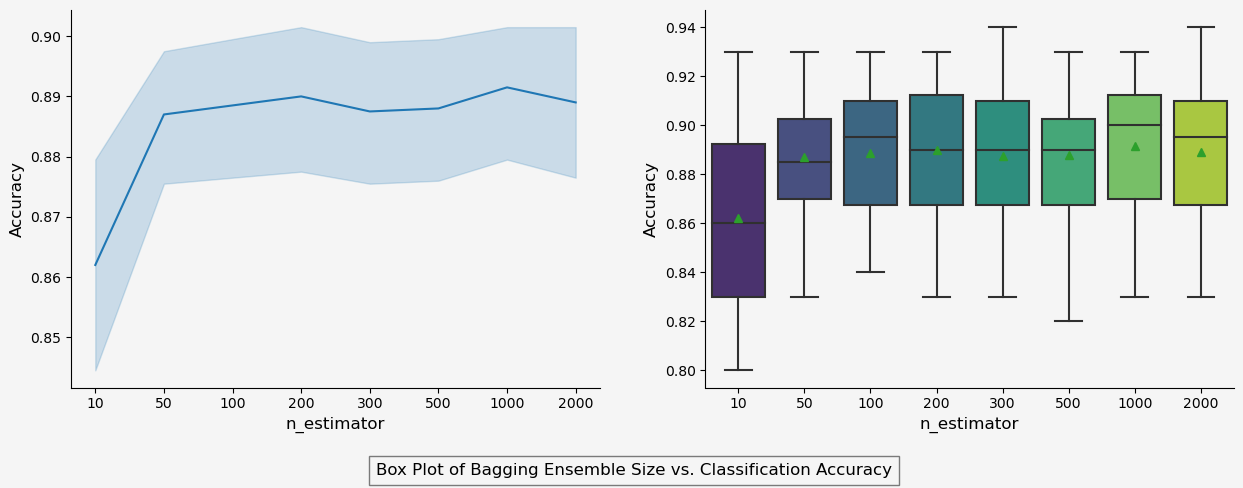

In [61]:
temp = pd.DataFrame(results).T
temp.columns = names
temp_melt = pd.melt(temp,value_vars=["10","50","100","200","300","500","1000","2000"],var_name="model",value_name="result")


# visualize the results
fig,ax = plt.subplots(1,2,figsize=(15,5),dpi=100,facecolor='whitesmoke')
sns.lineplot(data=temp_melt,x="model",y='result',estimator=np.mean,ax=ax[0])
ax[0].set_facecolor("whitesmoke")
ax[0].set_xlabel('n_estimator',fontsize=12)
ax[0].set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax[0].spines[spine].set_visible(False)

sns.boxplot(data=temp_melt,x="model",y="result",palette="viridis",ax=ax[1],showmeans=True)
ax[1].set_facecolor("whitesmoke")
ax[1].set_xlabel('n_estimator',fontsize=12)
ax[1].set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax[1].spines[spine].set_visible(False)

plt.figtext(0.5, -0.05, "Box Plot of Bagging Ensemble Size vs. Classification Accuracy", ha="center", fontsize=12, bbox={"facecolor":"whitesmoke", "alpha":0.5, "pad":5})
plt.show()


In this case, we can see that the performance of the bagging model converges to 0.888 when we grow 100 trees. The accuracy becomes flat after 100.

##### max_samples

Now let's explore the number of samples in bootstrapped dataset. The default is to create the same number of samples as the original train set.

In [85]:
def get_dataset():
    """Construct the dataset about binary problem"""
    X,y = make_classification(n_samples=1000,n_features=30,
               n_informative=15,n_redundant=5,random_state=1)
    return X,y

def build_models():
    """Build a set of Bagging Models with different number of Trees"""
    models = dict()
    for n in np.arange(0.1,1.1,0.1):
        models[str(n)] = BaggingClassifier(max_samples=n)
    return models

def evaluate_models(model,X,y):
    """Evaluate the performance of Bagging Models"""
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=2,random_state=1)
    cv_scores = cross_val_score(model,X,y,scoring="accuracy",cv=cv)
    return cv_scores

def main():
    # get the dataset
    X, y = get_dataset()
    # get models
    tree_models = build_models()
    # evaluate models
    results,names = [],[]
    for name,model in tree_models.items():
        names.append(name)
        results.append(evaluate_models(model,X,y))
    return names,results

# let's look at the results
names,results = main()
for index,result in enumerate(results):
    print(f"Number of Trees {names[index]}: {round(np.mean(result),3)} {round(np.std(result),3)}")

Number of Trees 0.1: 0.801 0.04
Number of Trees 0.2: 0.83 0.039
Number of Trees 0.30000000000000004: 0.849 0.029
Number of Trees 0.4: 0.842 0.031
Number of Trees 0.5: 0.856 0.039
Number of Trees 0.6: 0.866 0.037
Number of Trees 0.7000000000000001: 0.856 0.033
Number of Trees 0.8: 0.868 0.036
Number of Trees 0.9: 0.866 0.025
Number of Trees 1.0: 0.865 0.035


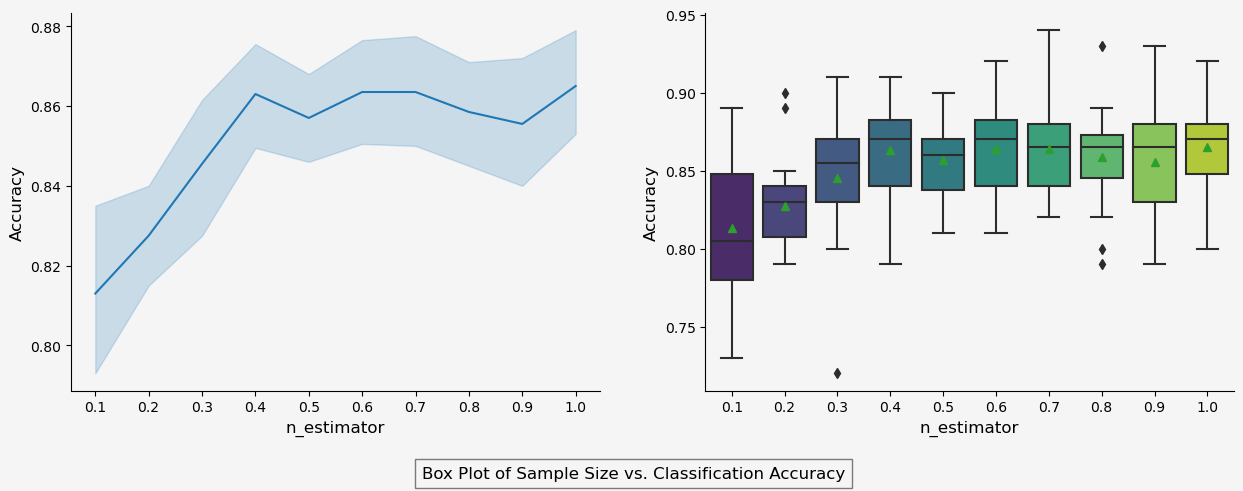

In [84]:
temp = pd.DataFrame(results).T
temp.columns = [str(round(i,1)) for i in np.arange(0.1,1.1,0.1)]
temp_melt = pd.melt(temp,value_vars=[str(round(i,1)) for i in np.arange(0.1,1.1,0.1)],var_name="model",value_name="result")


# visualize the results
fig,ax = plt.subplots(1,2,figsize=(15,5),dpi=100,facecolor='whitesmoke')
sns.lineplot(data=temp_melt,x="model",y='result',estimator=np.mean,ax=ax[0])
ax[0].set_facecolor("whitesmoke")
ax[0].set_xlabel('n_estimator',fontsize=12)
ax[0].set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax[0].spines[spine].set_visible(False)

sns.boxplot(data=temp_melt,x="model",y="result",palette="viridis",ax=ax[1],showmeans=True)
ax[1].set_facecolor("whitesmoke")
ax[1].set_xlabel('n_estimator',fontsize=12)
ax[1].set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax[1].spines[spine].set_visible(False)

plt.figtext(0.5, -0.05, "Box Plot of Sample Size vs. Classification Accuracy", ha="center", fontsize=12, bbox={"facecolor":"whitesmoke", "alpha":0.5, "pad":5})
plt.show()


The rule of thumb is that we set the max_sample to 1, but this does not mean all training observations will be selected from the train set. Since we leverage bootstrapping technique to select data from the training set at random with replacement, only about 63% of training instances are sampled on average on each predictor, while the remaining 37% of training instances are not sampled and thus called *out-of-bag* instances. 

Since the ensemble predictor never see the oob samples during training, it can be evaluated on these instances, without additional need for cross validation after training. We can use out-of-bag evaluation in scikit-learn by setting `oob_score=True`.

##### Out-of-bag Score

Let's try to use out-of-bag score to evaluate a bagging model.

In [88]:
# get the data
X, y = get_dataset()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)

# build bagging classifier
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,oob_score=True)
bag_clf.fit(X_train,y_train)

# look at the oob score
print(bag_clf.oob_score_)

0.87625


According to this oob evaluation, this BaggingClassifier is likely to achieve about 87.6% accuracy on the test set. Let’s verify this:

In [94]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
pred_score = accuracy_score(y_test,y_pred)
print(pred_score)

0.87


#### Random Patches and Random Subspaces

The BaggingClassifier class supports sampling the features as well. This is controlled by two hyperparameters: max_features and bootstrap_features. They work the same way as max_samples and bootstrap, but for feature sampling instead of instance sampling. Thus, each predictor will be trained on a random subset of the input features.

The random sampling of features is particularly useful for high-dimensional inputs, such as images. Randomly sampling both features and instances is called *Random Patches*. On the other hand, keeping all instances(`bootstrap=False,max_sample=1.0`) and sampling features(`bootstrap_features=True,max_features smaller than 1.0`) is called *Random Subspaces.*

##### Random Subspaces

Random subspaces ensemble is an extension to bagging ensemble model. It is created by a subset of features in the training set. Very similar to *Random Forest*, random subspace ensemble is different from it in only two aspects:

- Training data is not trained on bootstrapped samples but just random samples.
- The subset of features is selected on the entire tree rather than at each split point in the tree.

In [96]:
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# build random subspace ensemble
model = BaggingClassifier(bootstrap=False,max_samples=1.0,max_features=0.5) # forbit bootstrap and use a small set of features
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv,error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 0.886 (0.032)


Sampling features results in even more predictor diversity, trading a bit more bias for a lower variance.

**Reference:**

- [IBM](https://www.ibm.com/cloud/learn/bagging#:~:text=Bagging%2C%20also%20known%20as%20bootstrap,be%20chosen%20more%20than%20once.)
- [Hands-on Machine Learning](https://www.knowledgeisle.com/wp-content/uploads/2019/12/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf)
- [An Introduction to Statistical Learning](https://www.statlearning.com/)